[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[111 172 255]
  [106 167 255]
  [ 96 161 255]
  ...
  [ 73 131 248]
  [ 73 131 246]
  [ 71 130 245]]

 [[101 166 255]
  [ 96 161 255]
  [ 88 153 255]
  ...
  [ 73 131 248]
  [ 73 131 248]
  [ 71 130 247]]

 [[ 92 160 255]
  [ 89 157 255]
  [ 83 149 252]
  ...
  [ 73 131 248]
  [ 73 131 248]
  [ 71 130 247]]]


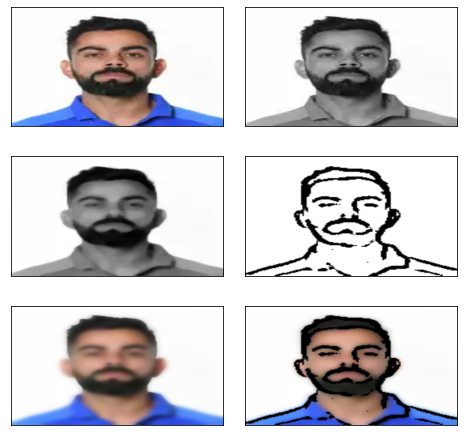

In [1]:
# Importing the required modules
import tkinter as tk  # graphical user interface toolkit
from tkinter import *
import easygui  # to open the filebox
import cv2  # for image processing
import matplotlib.pyplot as plt

import os  # to read and save path
import sys  #

# Making the GUI main window 
top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='blue')
label = Label(top, background='#CDCDCD', font=('calibri', 20, 'bold'))

""" fileopenbox opens the box to choose file
and help us store file path as string"""


def upload():
    image_path = easygui.fileopenbox()
    cartoonify(image_path)


# Step 3: How is an image stored?
def cartoonify(image_path):
    # read image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    print(original_image)  # this will be stored in form of number

    # to confirm it is image that was chosing
    if original_image is None:
        print("Can't find any image. Choose appropriate file")
        sys.exit()
    resize_image1 = cv2.resize(original_image, (960, 540))
    # plt.imshow(resize_image1, cmap='gray')

    # converting an image to grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    resize_image2 = cv2.resize(grayscale_image, (960, 540))
    # plt.imshow(resize_image2, cmap="gray")

    # applying median blur to smoothen an image
    smooth_grayscale_image = cv2.medianBlur(grayscale_image, 5)
    resize_image3 = cv2.resize(smooth_grayscale_image, (960, 540))
    #  plt.imshow(resize_image3, cmap='gray')

    # retrieving the edges for cartoon effect
    # by using thresholding technique
    get_edge = cv2.adaptiveThreshold(smooth_grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    resize_image4 = cv2.resize(get_edge, (960, 540))
    # plt.imshow(resize_image4, cmap='gray')

    # applying bilateral filter to remove noise
    # and keep edge sharp as required
    color_image = cv2.bilateralFilter(original_image, 9, 300, 300)
    resize_image5 = cv2.resize(color_image, (960, 540))
    # plt.imshow(resize_image5, cmap="gray")

    # masking edged image with our "BEAUTIFY" image
    cartoon_image = cv2.bitwise_and(color_image, color_image, mask=get_edge)
    resize_image6 = cv2.resize(cartoon_image, (960, 540))
    # plt.imshow(resize_image6, cmap='gray')

    # Plotting the whole transition
    images = [resize_image1, resize_image2, resize_image3, resize_image4, resize_image5, resize_image6]
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    # Making a Save button in the GUI main window
    savel = Button(top, text="Save cartoon image", command=lambda: save(resize_image6, image_path), padx=30, pady=5)
    savel.configure(background='#364156', foreground='white', font=('calibri', 10, 'bold'))
    savel.pack(side=TOP, pady=50)

    # save button code
    plt.show()


def save(resize_image6, image_path):
    # saving an image using imwrite function
    new_name = "cartoonified_Image"
    path1 = os.path.dirname(image_path)
    extension = os.path.splitext(image_path)[1]
    path = os.path.join(path1, new_name + extension)
    cv2.imwrite(path, cv2.cvtColor(resize_image6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + new_name + " at " + path
    tk.messagebox.showinfo(title=None, message=I)


# Making the Cartoonify button in the GUI main window
upload = Button(top, text="Cartoonify an Image", command=upload, padx=10, pady=5)
upload.configure(background="#374256", foreground="wheat", font=('calibri', 10, 'bold'))
upload.pack(side=TOP, pady=50)

# Main function to build the GUI window
top.mainloop()